# Titanic

Import Python libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the Data

In [2]:
train_df = pd.read_csv('train.csv')

Some Data Exploration

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Female versus Male Survivors

In [6]:
train_df.Survived[train_df.Sex=='female'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [7]:
train_df.Survived[train_df.Sex=='male'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

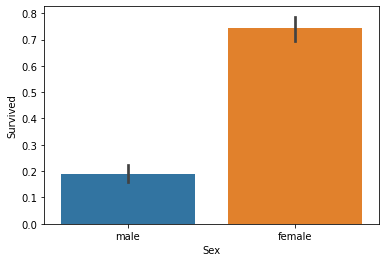

In [8]:
plt.figure()
sns.barplot(x="Sex", y="Survived", data=train_df)
plt.show()

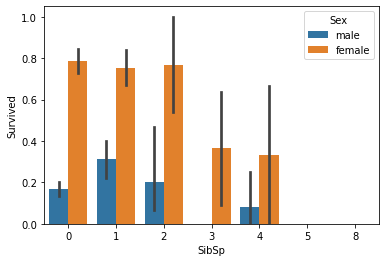

In [9]:
plt.figure()
sns.barplot(x="SibSp", y="Survived", hue='Sex', data=train_df)
plt.show()

### Adult versus Child survivors by Sex

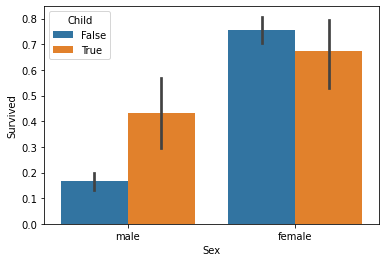

In [10]:
train_df['Child'] = train_df.Age <=16
plt.figure()
sns.barplot(x="Sex", y="Survived", hue="Child", data=train_df)
plt.show()

### Port of Embarkation

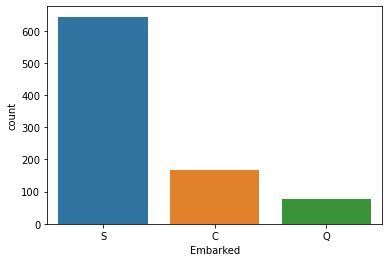

In [11]:
plt.figure()
sns.countplot(x="Embarked", data=train_df)
plt.show()

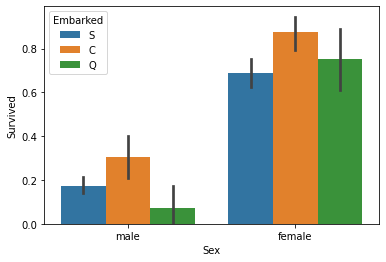

In [12]:
plt.figure()
sns.barplot(x="Sex", y="Survived", hue='Embarked',data=train_df)
plt.show()

### Survivors versus Fare
<li>Higher paying females were more likely to survive.
<li>Higher paying males were more likely to perish.

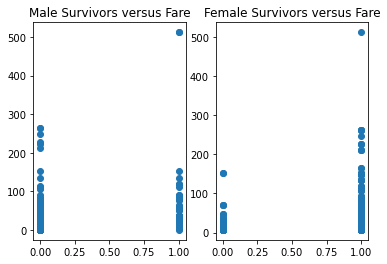

In [13]:
plt.figure()
plt.subplot(1,2,1)
plt.scatter(train_df.Survived[train_df.Sex=='male'],train_df.Fare[train_df.Sex=='male'] )
plt.title('Male Survivors versus Fare')
plt.subplot(1,2,2)
plt.scatter(train_df.Survived[train_df.Sex=='female'],train_df.Fare[train_df.Sex=='female'] )
plt.title('Female Survivors versus Fare')
plt.show()

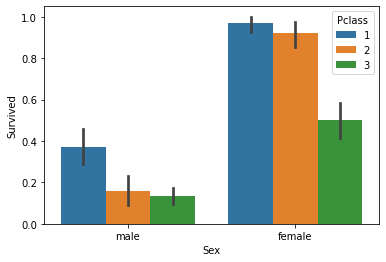

In [14]:
plt.figure()
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=train_df)
plt.show()

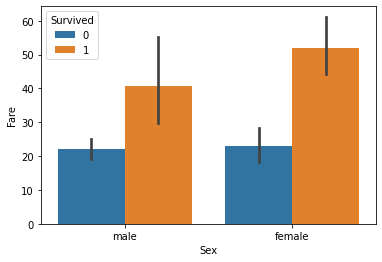

In [15]:
plt.figure()
sns.barplot(x="Sex", y="Fare", hue="Survived", data=train_df)
plt.show()

# Prepare Data for Analysis
Drop unnecessary fields

In [16]:
train_clean_df = train_df
train_clean_df = train_clean_df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

Add missing Ages as Mean

In [17]:
mean_age = train_clean_df["Age"].mean()
train_clean_df["Age"] = train_clean_df["Age"].fillna(mean_age)

Enumerate the Sex

In [18]:
train_clean_df['Sex'] = train_df.Sex == 'female'

In [19]:
train_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    bool   
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Child     891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(1)
memory usage: 50.6+ KB


In [20]:
train_clean_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Child
0,0,3,False,22.0,1,0,7.2500,S,False
1,1,1,True,38.0,1,0,71.2833,C,False
2,1,3,True,26.0,0,0,7.9250,S,False
3,1,1,True,35.0,1,0,53.1000,S,False
4,0,3,False,35.0,0,0,8.0500,S,False
